In [1]:
import nilearn as nl
import numpy as np
import nibabel as nb
import nilearn.plotting as nlplt
import nilearn
import matplotlib.pyplot as plt
from nilearn.image import resample_to_img

from scipy.stats import zscore


In [2]:
with open('pilots_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
good_subjects_list = [line.strip() for line in sub_list]

In [3]:
# extract arousal from niftis using the arousal template

In [6]:
# resample arousal templates to match hbn

one_percent=nb.load('../data/one_percent_template.nii')
arousal_full=nb.load('../data/full_template.nii')

sub=good_subjects_list[0]

sub_file=f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-{sub}/ses-HBNsiteRU/func/sub-{sub}_ses-HBNsiteRU_task-movieDM_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
sub_func=nb.load(sub_file)

one_percent=resample_to_img(one_percent,sub_func)
one_percent=one_percent.get_fdata()
one_percent_expanded = np.expand_dims(one_percent, axis=-1)

arousal_full=resample_to_img(arousal_full,sub_func)
arousal_full=arousal_full.get_fdata()
arousal_full_expanded = np.expand_dims(arousal_full, axis=-1)

# from nilearn.plotting import plot_stat_map, show
# plot_stat_map(one_percent_test)

In [8]:
# one_percent_list=[]
# arousal_full=[]
for i,sub in enumerate(good_subjects_list):
    print(f'{i} / {len(good_subjects_list)}')
    sub_file=f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/fmriprep_23.2.0/sub-{sub}/ses-HBNsiteRU/func/sub-{sub}_ses-HBNsiteRU_task-movieDM_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
    sub_func=nb.load(sub_file)
    sub_func=sub_func.get_fdata()

    # Assuming array1 has shape (64, 79, 68) and array2 has shape (64, 79, 68, 750)
    # array1 = np.random.rand(64, 79, 68)
    # array2 = np.random.rand(64, 79, 68, 750)
    # Expand the dimensions of array1 to match the dimensions of array2 for broadcasting
    one_percent_multiplied = one_percent_expanded * sub_func
    one_percent_multiplied = np.sum(one_percent_multiplied, axis=(0, 1, 2))
    np.save(f'../data/features/{sub}_one_percent_arousal.npy', one_percent_multiplied )

    #one_percent_list.append(one_percent_multiplied)
    arousal_full_multiplied = arousal_full_expanded * sub_func
    arousal_full_multiplied = np.sum(arousal_full_multiplied, axis=(0, 1, 2))
    #arousal_full.append(arousal_full_multiplied)
    np.save(f'../data/features/{sub}_full_template_arousal.npy', arousal_full_multiplied )

    #print(timecourse.shape)  # Should output (1, 750)
    #plt.plot(zscore(timecourse))

0 / 26
1 / 26
2 / 26
3 / 26
4 / 26
5 / 26
6 / 26
7 / 26
8 / 26
9 / 26
10 / 26
11 / 26
12 / 26
13 / 26
14 / 26
15 / 26
16 / 26
17 / 26
18 / 26
19 / 26
20 / 26
21 / 26
22 / 26
23 / 26
24 / 26
25 / 26


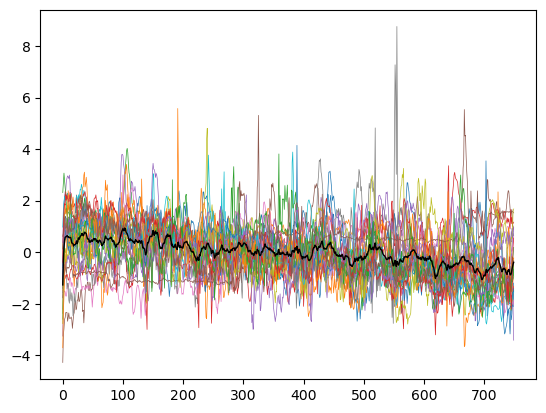

In [22]:
arousal_full_list=[]
for sub in good_subjects_list:
    arousal_full_multiplied=np.load(f'../data/features/{sub}_full_template_arousal.npy' )
    plt.plot(zscore(arousal_full_multiplied),linewidth=0.5)
    arousal_full_list.append(zscore(arousal_full_multiplied))
plt.plot(  np.mean(np.asanyarray(arousal_full_list),axis=0)  ,linewidth=1,c='k')


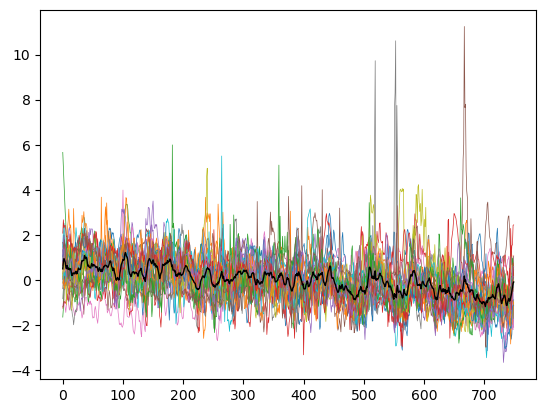

In [21]:
one_percent_list=[]
for sub in good_subjects_list:
    one_percent_multiplied=np.load(f'../data/features/{sub}_one_percent_arousal.npy' )
    plt.plot(zscore(one_percent_multiplied),linewidth=0.5)
    one_percent_list.append(zscore(one_percent_multiplied))
plt.plot(  np.mean(np.asanyarray(one_percent_list),axis=0)  ,linewidth=1,c='k')
#print(np.asanyarray(one_percent_list).shape)